In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge

# Obtenção dos Dados

In [13]:
df_data_t1 = pd.read_csv("../dados/data-t1.csv", index_col=0)

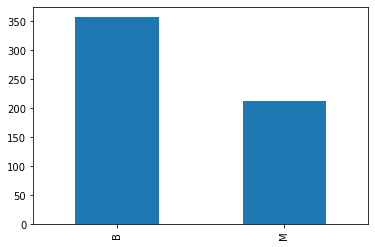

In [14]:
df_data_t1["diagnosis"].value_counts().plot.bar()

In [16]:
# Podemos ver que existem colunas que se relacionam
df_data_t1.columns.sort_values()

Index(['area_mean', 'area_se', 'area_worst', 'compactness_mean',
       'compactness_se', 'compactness_worst', 'concave points_mean',
       'concave points_se', 'concave points_worst', 'concavity_mean',
       'concavity_se', 'concavity_worst', 'diagnosis',
       'fractal_dimension_mean', 'fractal_dimension_se',
       'fractal_dimension_worst', 'perimeter_mean', 'perimeter_se',
       'perimeter_worst', 'radius_mean', 'radius_se', 'radius_worst',
       'smoothness_mean', 'smoothness_se', 'smoothness_worst', 'symmetry_mean',
       'symmetry_se', 'symmetry_worst', 'texture_mean', 'texture_se',
       'texture_worst'],
      dtype='object')

In [126]:
# reordenando as colunas
df_data_t1 = df_data_t1.reindex(columns=df_data_t1.columns.sort_values())

In [127]:
df_data_t1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area_mean                569 non-null    float64
 1   area_se                  569 non-null    float64
 2   area_worst               569 non-null    float64
 3   compactness_mean         569 non-null    float64
 4   compactness_se           569 non-null    float64
 5   compactness_worst        569 non-null    float64
 6   concave points_mean      569 non-null    float64
 7   concave points_se        569 non-null    float64
 8   concave points_worst     569 non-null    float64
 9   concavity_mean           569 non-null    float64
 10  concavity_se             569 non-null    float64
 11  concavity_worst          569 non-null    float64
 12  diagnosis                569 non-null    object 
 13  fractal_dimension_mean   569 non-null    float64
 14  fractal_dimension_s

In [154]:
df_data_t1.describe()

,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,654.889104,40.337079,880.583128,0.104341,0.025478,0.254265,0.048919,0.011796,0.114606,0.088799,...,16.269190,0.096360,0.007041,0.132369,0.181162,0.020542,0.290076,19.289649,1.216853,25.677223
std,351.914129,45.491006,569.356993,0.052813,0.017908,0.157336,0.038803,0.006170,0.065732,0.079720,...,4.833242,0.014064,0.003003,0.022832,0.027414,0.008266,0.061867,4.301036,0.551648,6.146258
min,143.500000,6.802000,185.200000,0.019380,0.002252,0.027290,0.000000,0.000000,0.000000,0.000000,...,7.930000,0.052630,0.001713,0.071170,0.106000,0.007882,0.156500,9.710000,0.360200,12.020000
25%,420.300000,17.850000,515.300000,0.064920,0.013080,0.147200,0.020310,0.007638,0.064930,0.029560,...,13.010000,0.086370,0.005169,0.116600,0.161900,0.015160,0.250400,16.170000,0.833900,21.080000
50%,551.100000,24.530000,686.500000,0.092630,0.020450,0.211900,0.033500,0.010930,0.099930,0.061540,...,14.970000,0.095870,0.006380,0.131300,0.179200,0.018730,0.282200,18.840000,1.108000,25.410000
75%,782.700000,45.190000,1084.000000,0.130400,0.032450,0.339100,0.074000,0.014710,0.161400,0.130700,...,18.790000,0.105300,0.008146,0.146000,0.195700,0.023480,0.317900,21.800000,1.474000,29.720000
max,2501.000000,542.200000,4254.000000,0.345400,0.135400,1.058000,0.201200,0.052790,0.291000,0.426800,...,36.040000,0.163400,0.031130,0.222600,0.304000,0.078950,0.663800,39.280000,4.885000,49.540000


## Tratamento dos Dados

In [48]:
def get_data(df, column_x, column_y):
    X = df[column_x]
    Y = df[column_y]
    return X, Y

In [145]:
def scikit_ridge_regression(X, Y, ridge_factor, n_features=1):
    X = np.array(X).reshape(-1, n_features)
    Y = np.array(Y).reshape(-1, 1)

    model = Ridge(alpha=ridge_factor).fit(X,Y)
    return model

In [146]:
def plot_2d_model(model, X, Y, label):
    x_linha = np.array(X)
    y_linha = x_linha * model.coef_[0][0] + model.intercept_[0]
    line_linear, = plt.plot(x_linha, y_linha, label=label)
    return line_linear

# Regressão Linear - Entre os dados numéricos

Podemos ver que existem muitas colunas correlacionadas, com 'mean', 'se' e 'worst'. É de se esperar que elas possuam uma relação linear entre elas.

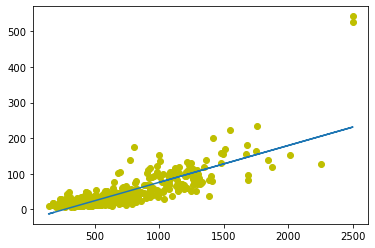

In [151]:
X, Y = get_data(df_data_t1, 'area_mean', 'area_se')
model = scikit_ridge_regression(X, Y, 0.1)
plt.scatter(X, Y, color='y')
plot_2d_model(model, X, Y, 'Regressão')

Em outros casos, podemos esperar uma relação quadrática, como a comparação de área com o raio.

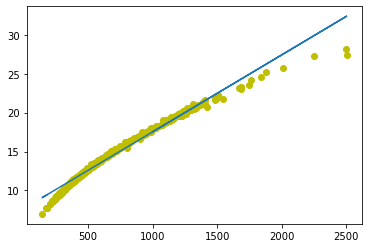

In [152]:
X, Y = get_data(df_data_t1, 'area_mean', 'radius_mean')
model = scikit_ridge_regression(X, Y, 0.1)
plt.scatter(X, Y, color='y')
plot_2d_model(model, X, Y, 'Regressão')

Outras não conseguimos determinar uma relação apenas pelo seu nome, como a área com a simetria, será que estão relacionados? De fato essa regressão está muito mais espalhada que as demais.

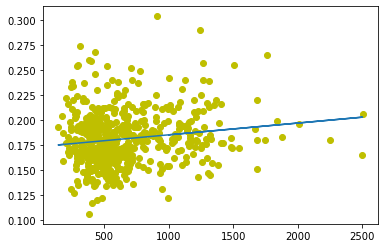

In [153]:
X, Y = get_data(df_data_t1, 'area_mean', 'symmetry_mean')
model = scikit_ridge_regression(X, Y, 0.1)
plt.scatter(X, Y, color='y')
plot_2d_model(model, X, Y, 'Regressão')

# Regressão Linear - Para Classificação

Como o dataset originalmente tinha um foco de classificação, devido a coluna 'diagnosis', não custa tentarmos utilizar a regressão na tentativa de classificação. Isso é possível porque nossa variável é binária e podemos definir 0 e 1 como seus valores. Definimos 1 como maligno e 0 como benigno. A regressão linear tentará definir um hiperplano que divide em dois subespaços.

Com certeza essa não é a melhor opção para realizar uma classificação, podendo utilizar uma regressão logística, porém dado o tema e o dataset é uma exploração interessante a se fazer.

In [155]:
# separacao de treinamento e validacao
df_data_t1_train, df_data_t1_test = train_test_split(df_data_t1, train_size=0.7)

In [170]:
# Obtendo os dados de treinamento
cols = df_data_t1_train.columns.tolist()
cols.remove("diagnosis")

X, y = get_data(df_data_t1_train, cols, "diagnosis")
y = y.map({'M': 1, 'B': 0})

In [175]:
# Criando o modelo de 'classificacao'
model = scikit_ridge_regression(X, y, 0.1, len(X.columns))

In [176]:
# Obtendo os dados de teste
cols = df_data_t1_test.columns.tolist()
cols.remove("diagnosis")

X_test, y_test = get_data(df_data_t1_test, cols, "diagnosis")

In [177]:
# Predizendo a partir do modelo e os dados de teste
y_pred = model.predict(X_test.values) 
y_pred_class = ['M' if y > 0.5 else 'B' for y in y_pred.flatten()]

In [174]:
from sklearn import metrics

print("Acurácia:", metrics.accuracy_score(y_test.tolist(), y_pred_class))
print("Precisão:", metrics.precision_score(y_test.tolist(), y_pred_class, average='binary', pos_label='M'))
print("Recall:", metrics.recall_score(y_test.tolist(), y_pred_class, average='binary', pos_label='M'))
print("F1-score:", metrics.f1_score(y_test.tolist(), y_pred_class, average='binary', pos_label='M'))

Acurácia: 0.9415204678362573
Precisão: 0.9574468085106383
Recall: 0.8490566037735849
F1-score: 0.9


### Comparativo com Regressão Logística

Podemos ver uma boa melhora utilizando a regressão logística.

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [190]:
# Obtendo os dados de treinamento
cols = df_data_t1_train.columns.tolist()
cols.remove("diagnosis")

X, Y = get_data(df_data_t1_train, cols, "diagnosis")

# Para chegar a convergência precisamos escalar
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
Y = np.array(Y)

# Treinamento
model = LogisticRegression().fit(X,Y)

In [193]:
# Predizendo a partir do modelo e os dados de teste

X_test, Y_test = get_data(df_data_t1_test, cols, "diagnosis")

# Para chegar a convergência precisamos escalar
X_test = scaler.transform(X_test)
Y_test = np.array(Y_test)

Y_pred = model.predict(X_test) 

In [195]:
from sklearn import metrics

print("Acurácia:", metrics.accuracy_score(Y_test.tolist(), Y_pred))
print("Precisão:", metrics.precision_score(Y_test.tolist(), Y_pred, average='binary', pos_label='M'))
print("Recall:", metrics.recall_score(Y_test.tolist(), Y_pred, average='binary', pos_label='M'))
print("F1-score:", metrics.f1_score(Y_test.tolist(), Y_pred, average='binary', pos_label='M'))

Acurácia: 0.9824561403508771
Precisão: 0.9807692307692307
Recall: 0.9622641509433962
F1-score: 0.9714285714285713
